# Datenauswertung Kompotoi Team A

### Last modified: Pascal Berger, 17.04.2021

### Last Run:

In [1]:
import datetime
print(datetime.datetime.now())

2021-04-27 14:26:11.885098


## Read data from sigfox api


Api Dokumentation gemäss: https://doc.iofrog.com/apidocumentation/api.html
Postman requests: https://www.getpostman.com/collections/eb80441a4500fd9a0634

In [90]:
# packages import
import time
import requests
import json
import pandas as pd
import numpy as np

from matplotlib import *
import matplotlib.pyplot as plt
import plotly.express as px


In [3]:
# helper function
def make_sorter(l):
    """
    Create a dict from the list to map to 0..len(l)
    Returns a mapper to map a series to this custom sort order
    """
    sort_order = {k:v for k,v in zip(l, range(len(l)))}
    return lambda s: s.map(lambda x: sort_order[x])

Login to api

In [4]:
url = "https://www.iofrog.com/api/v2/auth/signin/"

payload = json.dumps({
  "username": "pascal.berger@students.fhnw.ch",
  "password": "123321"
})
headers = {
  'Content-Type': 'application/json',
  'Cookie': ''
}

login_response = requests.request("POST", url, headers=headers, data=payload)
#print(login_response.text)


In [5]:
login_data = pd.read_json(login_response.text)
access_token = login_data.loc['accessToken', 'token']
login_data

,user,token
firstName,Pascal,NaN
lastName,Berger,NaN
isActivated,True,NaN
level,expert,NaN
partner,heliot,NaN
lang,en,NaN
timeZone,Europe/Berlin,NaN
units,"{'temperature': 'C', 'system': 'M'}",NaN
accessToken,NaN,eyJhbGciOiJIUzI1NiIsInR5cCI6IkpXVCJ9.eyJpZCI6I...
refreshToken,NaN,608802e52c93b277d8bf30b6.430284212c9fd83a65c56...


get devices data

In [6]:
url = "https://www.iofrog.com/api/v2/devices/dashboard"

# payload = json.dumps([
#   {
#     "data": [],
#     "count": 2,
#     "meta": {}
#   }
# ])
headers = {
  'Authorization': 'Bearer ' + access_token,
  'Content-Type': 'application/json',
  'Cookie': ''
}

devices_response = requests.request("GET", url, headers=headers)
#print(devices_response.text)


In [7]:
#print(devices_response.text)
#device_data = pd.read_json(devices_response.text)

device_dict = json.loads(devices_response.text)
device_data = pd.DataFrame.from_dict(device_dict['data'])
#device_data = pd.json_normalize(device_dict)
#device_dict['data']
device_data

,id,groupId,name,typeId,modeId,downlinkData,active,location,viewConfig,status,subscriptions,lastDataMessages,trackedKeys,badges,lastDataMessage,lastSourceBasedLocation
0,1F2504E,60476e95362d421c28ee0058,"B1 (PTH-04E, ex. Türe Beschl.)",simple_pack_plus_full_3_0_6_0,put_me_back,,True,"{'lat': None, 'lng': None}","{'locationSource': 'atlas', 'view': 'last'}","{'isRegistered': True, 'isReadyForActivation':...","[{'_id': '6050bd897d354e09ee4a5d37', 'provider...","[{'_id': '6087f2a3a6296a592ec9d7d2', 'keys': [...",[],[],"{'_id': '6087f2a3a6296a592ec9d7d2', 'keys': [{...",NaN
1,1F25047,60476e95362d421c28ee0058,"B2 (PTH-047, ex. Riegel Besch)",simple_pack_plus_full_3_0_6_0,put_me_back,,True,"{'lat': None, 'lng': None}","{'locationSource': 'fallback', 'view': 'last'}","{'isRegistered': True, 'isReadyForActivation':...","[{'_id': '60489b3f362d421c28f498b2', 'provider...","[{'_id': '6087fd58a6296a592ecacab4', 'keys': [...",[],[],"{'_id': '6087fd58a6296a592ecacab4', 'keys': [{...","{'geoplaces': [], '_id': '6058b9d703380b4c4fd1..."
2,2203AFA,60476e95362d421c28ee0058,"M1 (POC-AFA, ex. Türe Mag. a)",simple_pack_plus_full_3_0_6_0,reed_counter,,True,"{'lat': None, 'lng': None}","{'locationSource': 'fallback', 'view': 'last'}","{'isRegistered': True, 'isReadyForActivation':...","[{'_id': '60489ad5362d421c28f49667', 'provider...","[{'_id': '6087dedea6296a592ec83bc6', 'keys': [...",[],[],"{'_id': '6087dedea6296a592ec83bc6', 'keys': [{...","{'geoplaces': [], '_id': '605b4291f4e46133dc9b..."
3,2203AF9,60476e95362d421c28ee0058,M2 (POC-AF9),simple_pack_plus_full_3_0_6_0,reed_counter,,True,"{'lat': None, 'lng': None}","{'locationSource': 'atlas', 'view': 'last'}","{'isRegistered': True, 'isReadyForActivation':...","[{'_id': '6050c0467d354e09ee4aa73e', 'provider...","[{'_id': '6087a20e595b6e1522a78a1e', 'keys': [...",[],[],"{'_id': '6087a20e595b6e1522a78a1e', 'keys': [{...",NaN
4,2203ACB,60476e95362d421c28ee0058,"M3 (POC-ACB, ex. Riegel Mag.)",simple_pack_plus_full_3_0_6_0,reed_counter,,True,"{'lat': None, 'lng': None}","{'locationSource': 'fallback', 'view': 'last'}","{'isRegistered': True, 'isReadyForActivation':...","[{'_id': '60489995362d421c28f48edd', 'provider...","[{'_id': '6087f9f72c93b277d8be8195', 'keys': [...",[],[],"{'_id': '6087f9f72c93b277d8be8195', 'keys': [{...","{'geoplaces': [], '_id': '605b68f2f4e46133dc9e..."
5,2203AAB,60476e95362d421c28ee0058,"M4 (POC-AAB, ex. Türe Mag. in)",simple_pack_plus_full_3_0_6_0,reed_counter,,True,"{'lat': None, 'lng': None}","{'locationSource': 'fallback', 'view': 'last'}","{'isRegistered': True, 'isReadyForActivation':...","[{'_id': '60489bab362d421c28f49a02', 'provider...","[{'_id': '608675a0600a891442caefb9', 'keys': [...",[],[],"{'_id': '608675a0600a891442caefb9', 'keys': [{...","{'geoplaces': [], '_id': '6059fbafb3ae30315afb..."


---
## Read sensor data to dataframe

In [93]:
%%time
message_data_combined = pd.DataFrame()

#print(round(time.mktime(pd.to_datetime('2021-04-18').timetuple())))

for deviceid in device_data['id'].items():
  deviceid = deviceid[1]
  url = f"https://www.iofrog.com/api/v2/devices/{deviceid}/messages?timestampFrom={round(time.mktime(pd.to_datetime('2021-03-01').timetuple()))}&timestampTo{round(time.mktime(pd.to_datetime('2021-04-20').timetuple()))}=limit=10000"


  headers = {
    'Authorization': 'Bearer ' + access_token,
    'Content-Type': 'application/json',
    'Cookie': ''
  }
  message_response = requests.request("GET", url, headers=headers)
  # print(response.text)
  message_dict = json.loads(message_response.text)
  # json response to dataframe
  if 'code' in message_dict:
    print("Error reading sensor messages from device: " + deviceid)
    print(message_dict)
  else:
    message_data = pd.DataFrame.from_dict(message_dict['data'])
    message_data = message_data.drop(columns=['keys'])
    message_data_keys = pd.json_normalize(message_dict['data'], record_path='keys', record_prefix='keys_', meta='_id')
    message_data_keys = message_data_keys.pivot(index=['_id'], columns='keys_key', values='keys_value')
    message_data_keys.reset_index(inplace=True)
    message_data_keys = message_data_keys.groupby('_id').sum()
    #print(message_data_keys)
    # join df's
    message_data = message_data.merge(message_data_keys, on=['_id'], how='left', indicator=True)
    if len(message_data) >= 10000:
      print("Data overflow!!")
    message_data_combined = pd.concat([message_data_combined, message_data])

message_data_combined

Wall time: 2.42 s


,_id,timestamp,type,seqNumber,deviceId,created,__v,action,battery,mode,...,hw_config_has_button,hw_config_has_leakage,hw_config_has_led,hw_config_has_light,hw_config_has_reed,hw_config_has_wifi,hw_config_temp_type,version,counter,resetDetail
0,608806622c93b277d8bf6f19,1619527265,data_bidir,586.0,1F2504E,2021-04-27T12:41:06.208Z,0,orientation_changed,0,put_me_back,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6088061da6296a592ecb6a95,1619527196,data_bidir,585.0,1F2504E,2021-04-27T12:39:57.739Z,0,first_move,0,put_me_back,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,608805d22c93b277d8bf631b,1619527121,data_bidir,584.0,1F2504E,2021-04-27T12:38:42.068Z,0,orientation_changed,0,put_me_back,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6088058d2c93b277d8bf5ef1,1619527052,data_bidir,583.0,1F2504E,2021-04-27T12:37:33.558Z,0,first_move,0,put_me_back,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6087f2a3a6296a592ec9d7d2,1619522210,data_bidir,582.0,1F2504E,2021-04-27T11:16:51.667Z,0,orientation_changed,0,put_me_back,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,608183f4ab2eff3e2c3133f0,1619100659,data_bidir,879.0,2203AAB,2021-04-22T14:11:00.113Z,0,reed_counter,0,reed_counter,...,0,0,0,0,0,0,0,0,37,0
96,608183eb600a8914427f3cc8,1619100650,data_bidir,878.0,2203AAB,2021-04-22T14:10:51.438Z,0,reed_counter,0,reed_counter,...,0,0,0,0,0,0,0,0,37,0
97,608183e2ab2eff3e2c313348,1619100641,data_bidir,877.0,2203AAB,2021-04-22T14:10:42.904Z,0,reed_counter,0,reed_counter,...,0,0,0,0,0,0,0,0,37,0
98,608183df600a8914427f3c3a,1619100633,data_bidir,876.0,2203AAB,2021-04-22T14:10:39.747Z,0,reed_counter,0,reed_counter,...,0,0,0,0,0,0,0,0,37,0


In [92]:
# message_data_combined[message_data_combined['deviceId'] == '2203AAB'].sort_values('created')


1618696800

## Datatype conversions, remove of unused columns

In [69]:
message_data_combined['created'] = pd.to_datetime(message_data_combined['created'])
# not needed later
message_data_combined['timestamp'] = pd.to_datetime(message_data_combined['timestamp'])

print(type(message_data_combined.iloc[0,0]))
message_data_combined

<class 'str'>


,_id,timestamp,type,seqNumber,deviceId,created,__v,action,battery,dl_with_timestamp,...,x_max,x_min,y_fin,y_max,y_min,z_fin,z_max,z_min,_merge,counter
0,607c2ed2d131ef466470863d,1970-01-01 00:00:01.618751184,data_bidir,259.0,1F2504E,2021-04-18 13:06:26.061000+00:00,0,orientation_changed,0,0,...,32,16,1008,1008,992,0,16,-16,both,NaN
1,607c2e8d1ef743213dcec7d0,1970-01-01 00:00:01.618751116,data_bidir,258.0,1F2504E,2021-04-18 13:05:17.429000+00:00,0,first_move,0,0,...,0,0,0,0,0,0,0,0,both,NaN
2,607c16351ef743213dccbc11,1970-01-01 00:00:01.618744884,data_bidir,257.0,1F2504E,2021-04-18 11:21:25.320000+00:00,0,heartbeat_2,2.9,0,...,0,0,0,0,0,0,0,0,both,NaN
3,607bf9521ef743213dc9a3ed,1970-01-01 00:00:01.618737483,data_bidir,256.0,1F2504E,2021-04-18 09:18:10.459000+00:00,0,orientation_changed,0,0,...,16,0,1008,1008,992,0,0,-32,both,NaN
4,607bf907d131ef46646b5d70,1970-01-01 00:00:01.618737413,data_bidir,255.0,1F2504E,2021-04-18 09:16:55.375000+00:00,0,first_move,0,0,...,0,0,0,0,0,0,0,0,both,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1300,605e66e2f4713d0f5fc47b8e,1970-01-01 00:00:01.616799425,service_ack,NaN,2203AAB,2021-03-26 22:57:38.515000+00:00,0,device_setting_confirmed,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,both,0
1301,605e04fbf4713d0f5fbf6368,1970-01-01 00:00:01.616774394,data_bidir,42.0,2203AAB,2021-03-26 15:59:55.056000+00:00,0,reed_counter,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,both,138
1302,605de4852a74990a4d56320d,1970-01-01 00:00:01.616766083,data_bidir,41.0,2203AAB,2021-03-26 13:41:25.214000+00:00,0,heartbeat_1,3,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,both,0
1303,605cb053b016c47ea6888c6e,1970-01-01 00:00:01.616687154,data_bidir,40.0,2203AAB,2021-03-25 15:46:27.249000+00:00,0,reed_counter,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,both,88


### Convert int to float values

In [70]:
message_data_combined['counter'] = pd.to_numeric(message_data_combined['counter'])
message_data_combined

,_id,timestamp,type,seqNumber,deviceId,created,__v,action,battery,dl_with_timestamp,...,x_max,x_min,y_fin,y_max,y_min,z_fin,z_max,z_min,_merge,counter
0,607c2ed2d131ef466470863d,1970-01-01 00:00:01.618751184,data_bidir,259.0,1F2504E,2021-04-18 13:06:26.061000+00:00,0,orientation_changed,0,0,...,32,16,1008,1008,992,0,16,-16,both,NaN
1,607c2e8d1ef743213dcec7d0,1970-01-01 00:00:01.618751116,data_bidir,258.0,1F2504E,2021-04-18 13:05:17.429000+00:00,0,first_move,0,0,...,0,0,0,0,0,0,0,0,both,NaN
2,607c16351ef743213dccbc11,1970-01-01 00:00:01.618744884,data_bidir,257.0,1F2504E,2021-04-18 11:21:25.320000+00:00,0,heartbeat_2,2.9,0,...,0,0,0,0,0,0,0,0,both,NaN
3,607bf9521ef743213dc9a3ed,1970-01-01 00:00:01.618737483,data_bidir,256.0,1F2504E,2021-04-18 09:18:10.459000+00:00,0,orientation_changed,0,0,...,16,0,1008,1008,992,0,0,-32,both,NaN
4,607bf907d131ef46646b5d70,1970-01-01 00:00:01.618737413,data_bidir,255.0,1F2504E,2021-04-18 09:16:55.375000+00:00,0,first_move,0,0,...,0,0,0,0,0,0,0,0,both,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1300,605e66e2f4713d0f5fc47b8e,1970-01-01 00:00:01.616799425,service_ack,NaN,2203AAB,2021-03-26 22:57:38.515000+00:00,0,device_setting_confirmed,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,both,0.0
1301,605e04fbf4713d0f5fbf6368,1970-01-01 00:00:01.616774394,data_bidir,42.0,2203AAB,2021-03-26 15:59:55.056000+00:00,0,reed_counter,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,both,138.0
1302,605de4852a74990a4d56320d,1970-01-01 00:00:01.616766083,data_bidir,41.0,2203AAB,2021-03-26 13:41:25.214000+00:00,0,heartbeat_1,3,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,both,0.0
1303,605cb053b016c47ea6888c6e,1970-01-01 00:00:01.616687154,data_bidir,40.0,2203AAB,2021-03-25 15:46:27.249000+00:00,0,reed_counter,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,both,88.0


### Check and remove unused columns

In [71]:
print(message_data_combined.columns)

Index(['_id', 'timestamp', 'type', 'seqNumber', 'deviceId', 'created', '__v',
       'action', 'battery', 'dl_with_timestamp', 'firmware', 'humidity',
       'hw_config_accelerometer_type', 'hw_config_has_beeper',
       'hw_config_has_button', 'hw_config_has_leakage', 'hw_config_has_led',
       'hw_config_has_light', 'hw_config_has_reed', 'hw_config_has_wifi',
       'hw_config_temp_type', 'light_on', 'mode', 'reed_on', 'temperature',
       'version', 'x_fin', 'x_max', 'x_min', 'y_fin', 'y_max', 'y_min',
       'z_fin', 'z_max', 'z_min', '_merge', 'counter'],
      dtype='object')


In [72]:
print(message_data_combined['__v'].value_counts())
print(message_data_combined['hw_config_accelerometer_type'].value_counts())
print(message_data_combined['hw_config_has_beeper'].value_counts())
print(message_data_combined['hw_config_has_leakage'].value_counts())
print(message_data_combined['type'].value_counts())
print(message_data_combined['version'].value_counts())
print(message_data_combined['_merge'].value_counts())
print(message_data_combined['dl_with_timestamp'].value_counts())
# humidity is not working, always 0 or false
print(message_data_combined['humidity'].value_counts())
print(message_data_combined['light_on'].value_counts())
print(message_data_combined['reed_on'].value_counts())

print(message_data_combined['firmware'].value_counts())
# check if we need service informations -> not really, drop
message_data_combined.loc[message_data_combined['firmware'] == '1.0', 'firmware':'dl_with_timestamp'].head(1)


0    3600
Name: __v, dtype: int64
0           3593
LIS2DH12       7
Name: hw_config_accelerometer_type, dtype: int64
0        3593
false       7
Name: hw_config_has_beeper, dtype: int64
0        3593
false       7
Name: hw_config_has_leakage, dtype: int64
data_bidir     3583
service_ack      17
Name: type, dtype: int64
0    3593
6       7
Name: version, dtype: int64
both          3600
left_only        0
right_only       0
Name: _merge, dtype: int64
0        197
false      2
Name: dl_with_timestamp, dtype: int64
0     197
56      2
Name: humidity, dtype: int64
0        197
false      2
Name: light_on, dtype: int64
0        197
false      2
Name: reed_on, dtype: int64
0      3593
1.0       7
Name: firmware, dtype: int64


""
181


### 

In [73]:
# test, if we can gather informations from xyz values -> not really
print(message_data_combined['x_min'].value_counts().head())
print(message_data_combined['x_fin'].value_counts().head())
print(message_data_combined['x_max'].value_counts().head())
print(message_data_combined['y_min'].value_counts().head())
print(message_data_combined['y_max'].value_counts().head())
print(message_data_combined['z_min'].value_counts().head())
print(message_data_combined['z_max'].value_counts().head())

0      916
896    146
-32     83
912     62
-16     34
Name: x_min, dtype: int64
0      916
912    340
896     72
16      61
928     44
Name: x_fin, dtype: int64
0      916
928    158
912    153
0       64
944     45
Name: x_max, dtype: int64
0      916
432    254
416     93
960     66
992     60
Name: y_min, dtype: int64
0       916
448     190
976     109
1008     75
992      64
Name: y_max, dtype: int64
0      916
16     175
0      105
-16     65
-32     35
Name: z_min, dtype: int64
0     916
32    146
48    136
0      59
16     36
Name: z_max, dtype: int64


### drop columns

In [74]:
# to check for problems set: errors='raise', otherwise errors='ignore'
message_data_combined.drop(columns=['_id', 'timestamp', 'type', 'seqNumber', '__v', 'firmware', 'hw_config_accelerometer_type', 'hw_config_has_beeper', 'hw_config_has_button', 'hw_config_has_leakage', 'hw_config_has_led', 'hw_config_has_light', 'hw_config_has_reed', 'hw_config_has_wifi', 'hw_config_temp_type', 'version', '_merge', 'dl_with_timestamp', 'humidity', 'light_on', 'reed_on'], inplace=True, errors='ignore') 

message_data_combined.drop(columns=['x_min', 'x_fin', 'x_max', 'y_min', 'y_fin', 'y_max', 'z_min', 'z_fin', 'z_max'], inplace=True, errors='ignore')

message_data_combined

,deviceId,created,action,battery,mode,temperature,counter
0,1F2504E,2021-04-18 13:06:26.061000+00:00,orientation_changed,0,put_me_back,0,NaN
1,1F2504E,2021-04-18 13:05:17.429000+00:00,first_move,0,put_me_back,0,NaN
2,1F2504E,2021-04-18 11:21:25.320000+00:00,heartbeat_2,2.9,put_me_back,11,NaN
3,1F2504E,2021-04-18 09:18:10.459000+00:00,orientation_changed,0,put_me_back,0,NaN
4,1F2504E,2021-04-18 09:16:55.375000+00:00,first_move,0,put_me_back,0,NaN
...,...,...,...,...,...,...,...
1300,2203AAB,2021-03-26 22:57:38.515000+00:00,device_setting_confirmed,0,0,0,0.0
1301,2203AAB,2021-03-26 15:59:55.056000+00:00,reed_counter,0,reed_counter,0,138.0
1302,2203AAB,2021-03-26 13:41:25.214000+00:00,heartbeat_1,3,reed_counter,19.5,0.0
1303,2203AAB,2021-03-25 15:46:27.249000+00:00,reed_counter,0,reed_counter,0,88.0


### Sort datframe by sensorId and then by ascending creation timestamp

In [75]:
message_data_combined.sort_values(by=['deviceId', 'created'], inplace = True)
message_data_combined.reset_index(drop=True, inplace=True)
message_data_combined

,deviceId,created,action,battery,mode,temperature,counter
0,1F25047,2021-03-24 16:09:10.882000+00:00,first_move,0,put_me_back,0,NaN
1,1F25047,2021-03-24 16:10:03.512000+00:00,orientation_changed,0,put_me_back,0,NaN
2,1F25047,2021-03-24 16:10:19.624000+00:00,first_move,0,put_me_back,0,NaN
3,1F25047,2021-03-24 16:11:24.607000+00:00,orientation_changed,0,put_me_back,0,NaN
4,1F25047,2021-03-24 16:21:12.376000+00:00,end_of_orientation_alarm,0,put_me_back,0,NaN
...,...,...,...,...,...,...,...
3595,2203AFA,2021-04-17 07:50:47.981000+00:00,heartbeat_2,3,reed_counter,4.5,NaN
3596,2203AFA,2021-04-17 15:54:25.122000+00:00,heartbeat_2,2.9,reed_counter,15,NaN
3597,2203AFA,2021-04-17 15:55:18.374000+00:00,heartbeat_1,3,reed_counter,15,NaN
3598,2203AFA,2021-04-17 23:58:47.759000+00:00,heartbeat_2,2.9,reed_counter,6.5,NaN


### Fill counter values for non tilt sensors

In [76]:
print(message_data_combined['mode'].value_counts())
print(message_data_combined['action'].value_counts().head(7))
# use action = 'orientation_changed' as counter index as it has the most values
for deviceId in message_data_combined['deviceId'].unique():
    message_data_combined.loc[(message_data_combined['action'] == 'orientation_changed') & (message_data_combined['deviceId'] == deviceId), 'counter'] = (list(message_data_combined[(message_data_combined['action'] == 'orientation_changed') & (message_data_combined['deviceId'] == deviceId)].reset_index().index))

# message_data_combined['counter'] = np.cumsum(message_data_combined['counter'])
message_data_combined[message_data_combined['action'] == 'orientation_changed'].head(40)

reed_counter    1846
put_me_back     1541
press_me         196
0                 17
Name: mode, dtype: int64
reed_counter                1542
orientation_changed          647
first_move                   618
heartbeat_1                  457
heartbeat_2                  142
end_of_orientation_alarm      75
orientation_alarm             75
Name: action, dtype: int64


,deviceId,created,action,battery,mode,temperature,counter
1,1F25047,2021-03-24 16:10:03.512000+00:00,orientation_changed,0,put_me_back,0,0.0
3,1F25047,2021-03-24 16:11:24.607000+00:00,orientation_changed,0,put_me_back,0,1.0
7,1F25047,2021-03-24 16:24:28.338000+00:00,orientation_changed,0,put_me_back,0,2.0
9,1F25047,2021-03-24 16:41:07.753000+00:00,orientation_changed,0,put_me_back,0,3.0
11,1F25047,2021-03-24 17:06:50.172000+00:00,orientation_changed,0,put_me_back,0,4.0
15,1F25047,2021-03-24 17:09:13.311000+00:00,orientation_changed,0,put_me_back,0,5.0
19,1F25047,2021-03-24 17:36:56.221000+00:00,orientation_changed,0,put_me_back,0,6.0
22,1F25047,2021-03-24 17:51:05.607000+00:00,orientation_changed,0,put_me_back,0,7.0
26,1F25047,2021-03-24 18:08:28.456000+00:00,orientation_changed,0,put_me_back,0,8.0
28,1F25047,2021-03-24 18:10:13.556000+00:00,orientation_changed,0,put_me_back,0,9.0


In [77]:
# check if the strucure look ok
for deviceId in message_data_combined['deviceId'].unique():
    print(message_data_combined.loc[message_data_combined['deviceId'] == deviceId, ['deviceId', 'mode', 'created', 'counter']].head())

  deviceId         mode                          created  counter
0  1F25047  put_me_back 2021-03-24 16:09:10.882000+00:00      NaN
1  1F25047  put_me_back 2021-03-24 16:10:03.512000+00:00      0.0
2  1F25047  put_me_back 2021-03-24 16:10:19.624000+00:00      NaN
3  1F25047  put_me_back 2021-03-24 16:11:24.607000+00:00      1.0
4  1F25047  put_me_back 2021-03-24 16:21:12.376000+00:00      NaN
     deviceId      mode                          created  counter
1364  1F2504E  press_me 2021-03-25 08:45:25.628000+00:00      NaN
1365  1F2504E  press_me 2021-03-26 09:18:57.557000+00:00      NaN
1366  1F2504E  press_me 2021-03-27 09:50:29.340000+00:00      NaN
1367  1F2504E  press_me 2021-03-28 10:27:56.461000+00:00      NaN
1368  1F2504E  press_me 2021-03-29 11:02:14.920000+00:00      NaN
     deviceId          mode                          created  counter
1563  2203AAB  reed_counter 2021-03-25 13:14:43.865000+00:00      0.0
1564  2203AAB  reed_counter 2021-03-25 15:46:27.249000+00:00     88.

### Pivot data for each sensor

In [78]:
message_data_wide = message_data_combined.pivot(index=['created'], columns='deviceId', values='counter').reset_index().add_prefix('counter_')
message_data_wide.rename(columns={'counter_created':'created', 'counter_deviceId':'deviceId'}, inplace = True)
# divide AAB / 2 because door is opened twice per usage
message_data_wide['counter_2203AAB'] = message_data_wide['counter_2203AAB'] / 2
# offset for sensor which were started later
message_data_wide['counter_1F2504E'] = message_data_wide['counter_1F2504E'] + 264
# message_data_wide['counter_2203AF9'] = message_data_wide['counter_2203AF9'] + 41

message_data_wide.columns.name = None

message_data_wide

,created,counter_1F25047,counter_1F2504E,counter_2203AAB,counter_2203ACB,counter_2203AF9,counter_2203AFA
0,2021-03-24 16:09:10.882000+00:00,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-03-24 16:09:49.988000+00:00,NaN,NaN,NaN,57.0,NaN,NaN
2,2021-03-24 16:10:03.512000+00:00,0.0,NaN,NaN,NaN,NaN,NaN
3,2021-03-24 16:10:19.624000+00:00,NaN,NaN,NaN,NaN,NaN,NaN
4,2021-03-24 16:11:24.607000+00:00,1.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
3595,2021-04-18 13:44:31.145000+00:00,NaN,NaN,487.0,NaN,NaN,NaN
3596,2021-04-18 13:44:39.854000+00:00,NaN,NaN,487.0,NaN,NaN,NaN
3597,2021-04-18 13:44:48.462000+00:00,NaN,NaN,487.0,NaN,NaN,NaN
3598,2021-04-18 13:44:57.087000+00:00,NaN,NaN,487.0,NaN,NaN,NaN


In [79]:
message_data_wide['counter_2203AAB']

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
        ...  
3595    487.0
3596    487.0
3597    487.0
3598    487.0
3599      NaN
Name: counter_2203AAB, Length: 3600, dtype: float64

### Fill 0 with old values, generate differential counter values

In [80]:
# group by hour
message_data_wide.set_index('created', inplace=True)
message_data_wide = message_data_wide.resample('H').max()
# inplace here to have created as valid column again to do [1:]
message_data_wide.reset_index(inplace=True)

# replace na's with 0's
message_data_wide.iloc[:, 1:] = message_data_wide.iloc[:, 1:].fillna(0)
# forward fill all columns
message_data_wide.iloc[:, 1:] = message_data_wide.iloc[:, 1:].replace(to_replace=0, method='ffill')


for column in message_data_wide.columns[1:]:
    # replace nas and 0's with previous values
    #print(column)
    message_data_wide[f'diff_{column}'] = message_data_wide[column].diff().shift(-1)
    # delete value of first row
    message_data_wide[f'diff_{column}'][0] = 0

# delete cummulative 0's that are left now
cum_columns = list(message_data_wide.columns[message_data_wide.columns.str.startswith('counter_')])
message_data_wide[cum_columns] = message_data_wide[cum_columns].replace(0, np.nan)

message_data_wide

<ipython-input-80-568d5621bf1c>:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,created,counter_1F25047,counter_1F2504E,counter_2203AAB,counter_2203ACB,counter_2203AF9,counter_2203AFA,diff_counter_1F25047,diff_counter_1F2504E,diff_counter_2203AAB,diff_counter_2203ACB,diff_counter_2203AF9,diff_counter_2203AFA
0,2021-03-24 16:00:00+00:00,3.0,NaN,NaN,60.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
1,2021-03-24 17:00:00+00:00,7.0,NaN,NaN,64.0,NaN,NaN,4.0,0.0,0.0,2.0,0.0,0.0
2,2021-03-24 18:00:00+00:00,11.0,NaN,NaN,66.0,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0
3,2021-03-24 19:00:00+00:00,12.0,NaN,NaN,66.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
4,2021-03-24 20:00:00+00:00,12.0,NaN,NaN,66.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
594,2021-04-18 10:00:00+00:00,571.0,333.0,485.0,394.0,32.0,NaN,1.0,0.0,1.0,0.0,0.0,0.0
595,2021-04-18 11:00:00+00:00,572.0,333.0,486.0,394.0,32.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0
596,2021-04-18 12:00:00+00:00,572.0,333.0,486.0,394.0,32.0,NaN,3.0,1.0,1.0,1.0,0.0,0.0
597,2021-04-18 13:00:00+00:00,575.0,334.0,487.0,395.0,32.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0


### Don't allow negative values, remove too big diffs that represent value losses

In [81]:
print(message_data_wide.isna().sum())

diff_columns = list(message_data_wide.columns[message_data_wide.columns.str.startswith('diff_')])

for diff_column in diff_columns:
    # us np.nan, because pd.NA is non numeric and cannot be aggregated except after ifillna(0)
    message_data_wide.loc[message_data_wide[diff_column] < 0, diff_column] = np.nan
    message_data_wide.loc[message_data_wide[diff_column] > 10, diff_column] = np.nan

message_data_wide.isna().sum()

created                   0
counter_1F25047           0
counter_1F2504E         382
counter_2203AAB          23
counter_2203ACB           0
counter_2203AF9          49
counter_2203AFA         599
diff_counter_1F25047      1
diff_counter_1F2504E      1
diff_counter_2203AAB      1
diff_counter_2203ACB      1
diff_counter_2203AF9      1
diff_counter_2203AFA      1
dtype: int64


created                   0
counter_1F25047           0
counter_1F2504E         382
counter_2203AAB          23
counter_2203ACB           0
counter_2203AF9          49
counter_2203AFA         599
diff_counter_1F25047      1
diff_counter_1F2504E      2
diff_counter_2203AAB      5
diff_counter_2203ACB      2
diff_counter_2203AF9      1
diff_counter_2203AFA      1
dtype: int64

## Create Daily data overview

In [82]:
# group by hour
message_data_wide.set_index('created', inplace=True)
message_data_days = message_data_wide.resample('D').max()
# inplace here to have created as valid column again to do [1:]
message_data_wide.reset_index(inplace=True)
message_data_days.reset_index(inplace=True)

# select date only, rest is 0
message_data_days['created'] = message_data_days['created'].dt.date

message_data_days.head()

,created,counter_1F25047,counter_1F2504E,counter_2203AAB,counter_2203ACB,counter_2203AF9,counter_2203AFA,diff_counter_1F25047,diff_counter_1F2504E,diff_counter_2203AAB,diff_counter_2203ACB,diff_counter_2203AF9,diff_counter_2203AFA
0,2021-03-24,12.0,NaN,NaN,66.0,NaN,NaN,4.0,0.0,0.0,2.0,0.0,0.0
1,2021-03-25,31.0,NaN,44.0,77.0,NaN,NaN,4.0,0.0,0.0,2.0,0.0,0.0
2,2021-03-26,70.0,NaN,69.0,101.0,3.0,NaN,8.0,0.0,0.0,6.0,2.0,0.0
3,2021-03-27,79.0,NaN,83.0,104.0,8.0,NaN,3.0,0.0,1.0,1.0,2.0,0.0
4,2021-03-28,102.0,NaN,108.5,126.0,15.0,NaN,6.0,0.0,4.5,4.0,3.0,0.0


### Group by hours of day

In [83]:
hours = message_data_wide['created'].dt.hour

message_data_day = message_data_wide.groupby(hours).sum()
message_data_day.reset_index(inplace = True)
message_data_day.rename(columns = {'created': 'hour_of_day'}, inplace=True)

# print(message_data_wide.isna().sum())
message_data_day

,hour_of_day,counter_1F25047,counter_1F2504E,counter_2203AAB,counter_2203ACB,counter_2203AF9,counter_2203AFA,diff_counter_1F25047,diff_counter_1F2504E,diff_counter_2203AAB,diff_counter_2203ACB,diff_counter_2203AF9,diff_counter_2203AFA
0,0,7003.0,2713.0,6239.5,5558.0,536.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1,7004.0,2713.0,6239.5,5558.0,536.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,7004.0,2713.0,6239.5,5558.0,536.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,7004.0,2713.0,6239.5,5558.0,536.0,0.0,5.0,2.0,3.0,2.0,0.0,0.0
4,4,7009.0,2715.0,6242.5,5560.0,536.0,0.0,7.0,1.0,4.0,4.0,0.0,0.0
5,5,7016.0,2716.0,6246.5,5564.0,536.0,0.0,31.0,2.0,22.5,14.0,1.0,0.0
6,6,7047.0,2718.0,6269.0,5578.0,537.0,0.0,36.0,6.0,24.5,9.0,6.0,0.0
7,7,7083.0,2724.0,6293.5,5587.0,543.0,0.0,42.0,8.0,30.5,21.0,6.0,0.0
8,8,7125.0,2732.0,6324.0,5608.0,549.0,0.0,43.0,2.0,31.0,27.0,1.0,0.0
9,9,7168.0,2734.0,6355.0,5635.0,550.0,0.0,29.0,4.0,19.0,16.0,0.0,0.0


### Group by days of week

In [84]:
day_of_week = message_data_wide['created'].dt.day_name()
# group
message_data_week = message_data_wide.groupby(day_of_week).sum()
message_data_week.reset_index(inplace=True)
# sort by weekday
cats = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

message_data_week.sort_values('created', key=make_sorter(cats), inplace=True)

message_data_week

,created,counter_1F25047,counter_1F2504E,counter_2203AAB,counter_2203ACB,counter_2203AF9,counter_2203AFA,diff_counter_1F25047,diff_counter_1F2504E,diff_counter_2203AAB,diff_counter_2203ACB,diff_counter_2203AF9,diff_counter_2203AFA
1,Monday,18862.0,6955.0,17009.0,15244.0,1637.0,0.0,64.0,8.0,48.0,35.0,4.0,0.0
5,Tuesday,20480.0,7102.0,18279.0,16071.0,1709.0,0.0,71.0,3.0,59.0,36.0,2.0,0.0
6,Wednesday,22253.0,7288.0,19710.5,17586.0,1735.0,0.0,74.0,13.0,59.0,49.0,1.0,0.0
4,Thursday,24775.0,7596.0,21950.0,20092.0,1857.0,0.0,129.0,13.0,96.5,77.0,7.0,0.0
0,Friday,27648.0,10465.0,24670.0,21845.0,1969.0,0.0,108.0,8.0,54.5,67.0,5.0,0.0
2,Saturday,29593.0,14421.0,26138.5,22988.0,2104.0,0.0,59.0,13.0,35.5,32.0,5.0,0.0
3,Sunday,25980.0,11750.0,23065.0,20256.0,1979.0,0.0,63.0,12.0,38.5,21.0,8.0,0.0


---
# Visualizations

In [85]:
def get_sub_columns(df, cumulative : bool, index : str):
    if cumulative:
        columns = list(df.columns[df.columns.str.startswith('diff_')])
    else:
        columns = list(df.columns[df.columns.str.startswith('counter_')])

    columns.append(index)
    return columns

## Cummulative data over time

In [86]:
def customLegend(fig, nameSwap):
    for i, dat in enumerate(fig.data):
        for elem in dat:
            if elem == 'name':
                # print(fig.data[i].name)
                if fig.data[i].name in nameSwap.keys():
                    fig.data[i].name = nameSwap[fig.data[i].name]
    return(fig)

vis_data = message_data_wide.drop(columns = 'counter_2203AF9')
# subselect dat until April 18
vis_data = vis_data[vis_data['created'].dt.date <= pd.to_datetime('2021-04-18')]

fig = px.line(vis_data, x='created', y=get_sub_columns(vis_data, False, 'created'), width=1500, height=500, title='WC Besuche über Zeit')
# titles
# fig.update_xaxes(title_text='Datum')
# fig.update_yaxes(title_text='WC-Besuche')
fig.update_layout(
    xaxis_title = 'Datum',
    yaxis_title = 'WC Besuche',
    legend_title = 'Sensoren'
)
# legend
fig = customLegend(fig=fig, nameSwap = \
    { \
        'counter_1F25047' : 'Türriegel Neigung (1F25047)', \
        'counter_2203ACB' : 'Türriegel Magnet (2203ACB)', \
        'counter_1F2504E' : 'Türe unten Beschleunigung (1F2504E)', \
        'counter_2203AFA' : 'Türe open aussen Magnet (2203AFA)', \
        'counter_2203AAB' : 'Türe open innen Magnet (2203AAB)', \
        'counter_2203AF9' : 'Test Sensor (nicht installiert) (2203AF9)', \
    })

# set color
# fig.data[0].line.color = 'rgb(0, 0, 0)'
# fig.data[1].line.color = 'rgb(0, 0, 255)'

fig.show()

# matiplotlib (date formatting is not so nice)
# ax = message_data_wide[get_sub_columns(False, 'created')].plot(kind='line', x='created', figsize=(22, 5), style='-')

# ax.set_title('WC Besuche über Zeit')
# ax.set_xlabel('Date')
# ax.set_ylabel('WC-Besuche')

# ax.xaxis.set_major_formatter(dates.DateFormatter("%d.%m.%Y"))

## Differential data over time

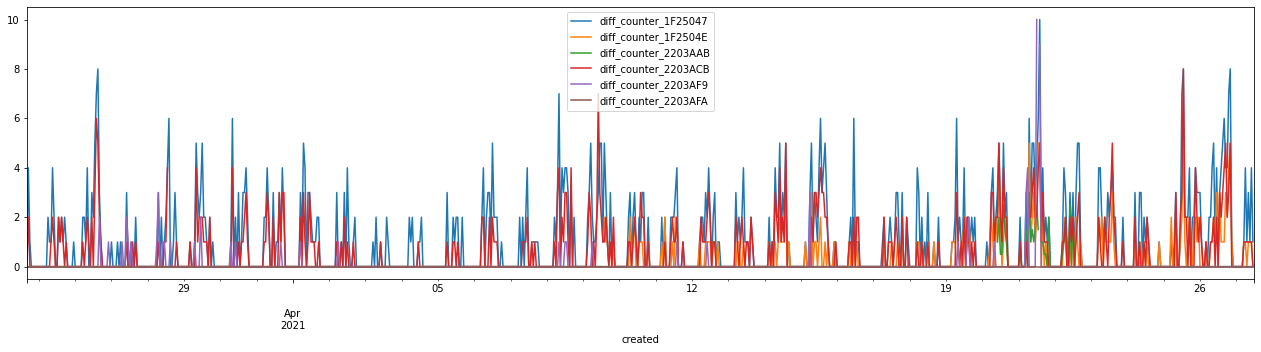

In [27]:

ax = message_data_wide[get_sub_columns(message_data_wide, True, 'created')].plot(kind = 'line', x='created', figsize=(22, 5))
# ax.set_ylim([0, 20])

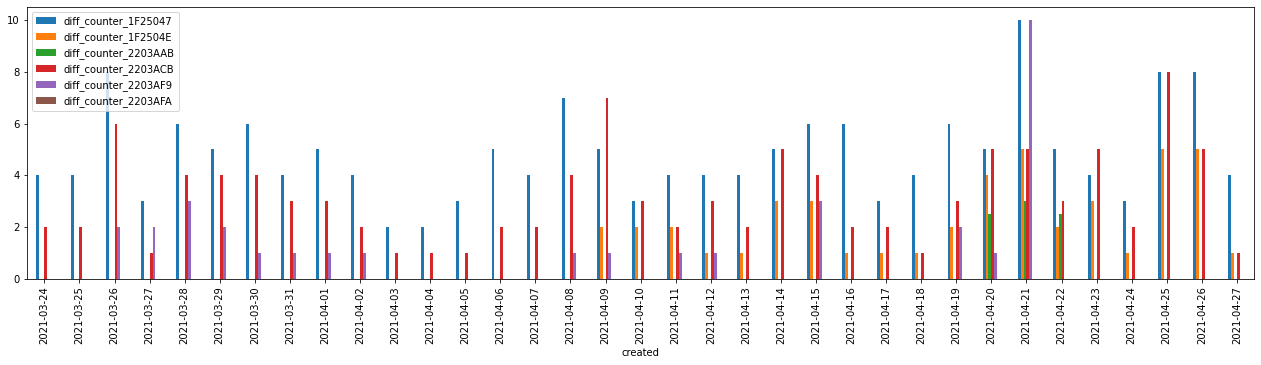

In [28]:

ax = message_data_days[get_sub_columns(message_data_wide, True, 'created')].plot(kind = 'bar', x='created', figsize=(22, 5))

# ax.xaxis.set_major_formatter(dates.DateFormatter("%d.%m.%Y"))

## Differential data during one day

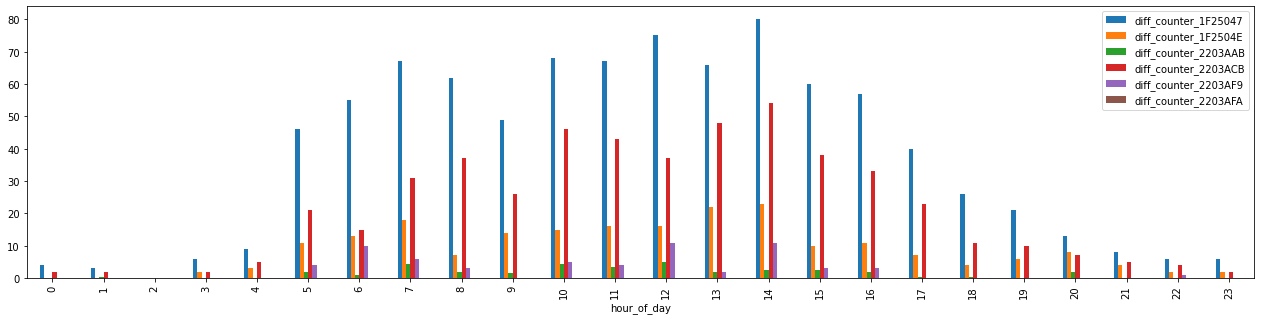

In [29]:

ax = message_data_day[get_sub_columns(message_data_wide, True, 'hour_of_day')].plot(kind = 'bar', x='hour_of_day', figsize=(22,5))

## Differential data during one week

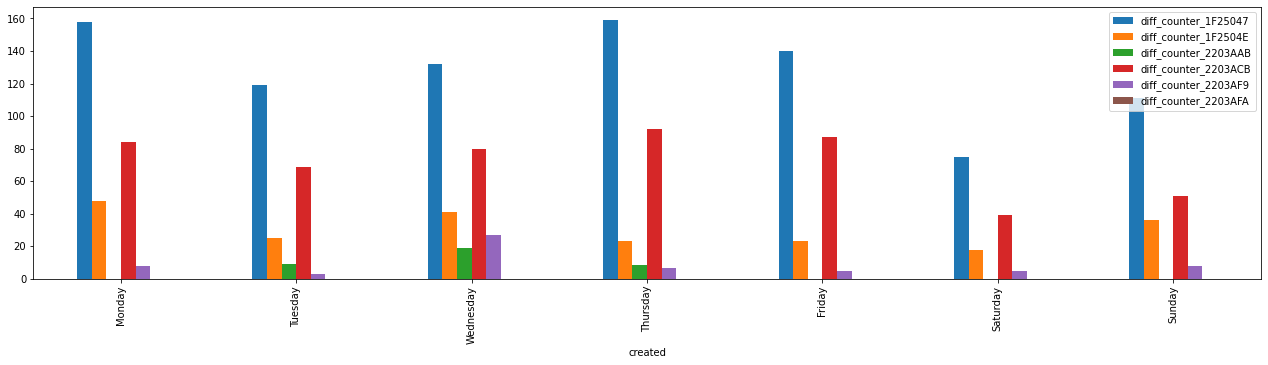

In [30]:

ax = message_data_week[get_sub_columns(message_data_wide, True, 'created')].plot(kind = 'bar', x='created', figsize=(22,5))


---
## Spielwiese

<AxesSubplot:xlabel='created'>

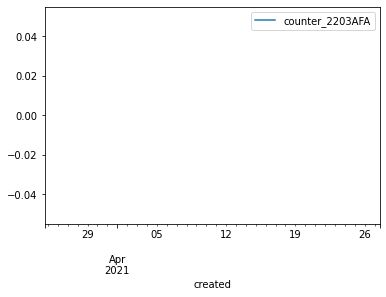

In [45]:
# message_data_wide[['created', 'counter_1F2504E']].plot(x='created')
message_data_wide[['created', 'counter_2203AFA']].plot(x='created')

## google drive api (testing still)

In [32]:
# pip install pydrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive

In [33]:
# Rename the downloaded JSON file to client_secrets.json
# The client_secrets.json file needs to be in the same directory as the script.
gauth = GoogleAuth()
drive = GoogleDrive(gauth)
# List files in Google Drive
fileList = drive.ListFile({'q': "'1pxYux33QnFcvrpP17Q88_xY1nW79aJL-' in parents and trashed=false"}).GetList()
# for file1 in fileList:
#   print('title: %s, id: %s' % (file1['title'], file1['id']))

  

Your browser has been opened to visit:

    https://accounts.google.com/o/oauth2/auth?client_id=491460359726-lj3ilu22ir8ckqnjefot5gs99vmig1d2.apps.googleusercontent.com&redirect_uri=http%3A%2F%2Flocalhost%3A8080%2F&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&access_type=offline&response_type=code

Authentication successful.


In [34]:
fileCons = list()

for file1 in fileList:
  if 'downloadUrl' in file1:
    fileCons.append(requests.get(file1['downloadUrl']).content)
  else:
    print('unsupported file')
    print(file1)

unsupported file
GoogleDriveFile({'kind': 'drive#file', 'id': '1d0ORJisSlsO68xoX9jHrC8vsGZgaNfn1d45gVDojFCA', 'etag': '"MTYxNjc3NDQ0MTgxNA"', 'selfLink': 'https://www.googleapis.com/drive/v2/files/1d0ORJisSlsO68xoX9jHrC8vsGZgaNfn1d45gVDojFCA', 'alternateLink': 'https://docs.google.com/document/d/1d0ORJisSlsO68xoX9jHrC8vsGZgaNfn1d45gVDojFCA/edit?usp=drivesdk', 'embedLink': 'https://docs.google.com/document/d/1d0ORJisSlsO68xoX9jHrC8vsGZgaNfn1d45gVDojFCA/preview?ouid=115354251365952521942', 'iconLink': 'https://drive-thirdparty.googleusercontent.com/16/type/application/vnd.google-apps.document', 'thumbnailLink': 'https://docs.google.com/feeds/vt?gd=true&id=1d0ORJisSlsO68xoX9jHrC8vsGZgaNfn1d45gVDojFCA&v=1&s=AMedNnoAAAAAYIgfMMzkjiHpAgEH36Kxi8dzTMqsx7qw&sz=s220', 'title': 'Unbenanntes Dokument', 'mimeType': 'application/vnd.google-apps.document', 'labels': {'starred': False, 'hidden': False, 'trashed': False, 'restricted': False, 'viewed': True}, 'copyRequiresWriterPermission': False, 'creat

In [35]:
print(fileCons)

[b'{\n "error": {\n  "errors": [\n   {\n    "domain": "usageLimits",\n    "reason": "dailyLimitExceededUnreg",\n    "message": "Daily Limit for Unauthenticated Use Exceeded. Continued use requires signup.",\n    "extendedHelp": "https://code.google.com/apis/console"\n   }\n  ],\n  "code": 403,\n  "message": "Daily Limit for Unauthenticated Use Exceeded. Continued use requires signup."\n }\n}\n']


### Jira rest api

In [36]:
import requests
import json
import base64

# Base encode email and api token
cred =  "Basic " + base64.b64encode(b'pascal.berger@students.fhnw.ch:sSrxfdz6DTjt1Sk0C2Wz6071').decode("utf-8") 

# Set header parameters
headers = {
   "Accept": "application/json",
   "Content-Type": "application/json",
   "Authorization" : cred
}
# Enter your project key here
projectKey = "SERVICE"

# Update your site url 
site_url = "https://kompotoi.atlassian.net/rest/api/3"

### Access issues

In [37]:
url = f"{site_url}/search?jql=project={projectKey}"

# Send request and get response
response = requests.request("GET", url, headers=headers)

# Decode Json string to Python
json_data = json.loads(response.text)

# Display issues
# json_data["issues"]

for item in json_data["issues"]:

    print(item["id"] + "\t" + item["key"] + "\t" +
        item["fields"]["issuetype"]["name"] + "\t" +
        item["fields"]["created"]+ "\t" +
        item["fields"]["creator"]["displayName"] + "\t" +
        item["fields"]["status"]["name"] + "\t" +
        item["fields"]["summary"] + "\t" 
        )

    # print(item["fields"]["status"]["name"])

10007	SERVICE-8	Bug	2021-04-27T13:33:31.239+0200	Pascal Berger (s)	Backlog	REST ye merry gentlemen.	
10006	SERVICE-7	Bug	2021-04-27T13:04:21.159+0200	Pascal Berger (s)	Backlog	REST ye merry gentlemen.	
10005	SERVICE-6	Bug	2021-04-27T10:56:58.437+0200	Pascal Berger (s)	Backlog	REST ye merry gentlemen.	
10004	SERVICE-5	Bug	2021-04-26T21:35:00.967+0200	Pascal Berger (s)	Backlog	REST ye merry gentlemen.	
10003	SERVICE-4	Bug	2021-04-26T18:35:38.293+0200	Pascal Berger (s)	Backlog	REST ye merry gentlemen.	
10002	SERVICE-3	Bug	2021-04-26T09:21:11.915+0200	Pascal Berger (s)	Backlog	REST ye merry gentlemen.	
10001	SERVICE-2	Bug	2021-04-24T16:31:02.978+0200	Pascal Berger (s)	Backlog	REST ye merry gentlemen.	
10000	SERVICE-1	Story	2021-04-24T16:09:04.555+0200	Pascal Berger (s)	Backlog	Test issue	


#### Move issue

In [38]:
done_id = 41
# get id of first element
issue_id = json_data["issues"][0]['id']

url = f"{site_url}/issue/{issue_id}/transitions?expand=transitions.fields"

json_content = \
'''
{
    "transition":
    {
        "id" : ''' + f"'{str(done_id)}'" + '''
    }
}
'''
json_content

# Send request and get response
# response = requests.request("POST", url, headers=headers, data=json_content)

# json_data = json.loads(response.text)
# json_data

'\n{\n    "transition":\n    {\n        "id" : \'41\'\n    }\n}\n'

#### Create issue

In [39]:
url = f"{site_url}/issue"

json_content = \
'''
{
    "fields": {
       "project":
       {
          "key": "''' + projectKey + '''"
       },
       "summary": "REST ye merry gentlemen.",
       "description": {
          "type": "doc",
          "version": 1,
          "content": [
            {
              "type": "paragraph",
              "content": [
                {
                  "type": "text",
                  "text": "description"
                }
              ]
            }
          ]
        },
       "issuetype": {
          "name": "Bug"
       }
   }
}
'''
# json_content

# Send request and get response
response = requests.request("POST", url, headers=headers, data=json_content)

# Decode Json string to Python
json_data = json.loads(response.text)
json_data
# response.textp

{'id': '10008',
 'key': 'SERVICE-9',
 'self': 'https://kompotoi.atlassian.net/rest/api/3/issue/10008'}